In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import os, sys, time
import pandas as pd
import scipy.stats as stats
sys.path.append('../../')
import gp_regression as gp

%matplotlib inline

In [67]:
np.random.seed(3)
x = np.linspace(0,4,  num=50)
y = 2*x

scale=1
y_obs = y + stats.norm.rvs(scale=scale, size=len(x))

cov = gp.covariance_functions(1, 10)
gp_obj = gp.gaussian_process(x, x, y_obs, scale, cov)

ystar, var = gp_obj.regression()
y_hi = ystar + np.sqrt(var)*1.96
y_lo = ystar - np.sqrt(var)*1.96

In [68]:
# print(gp_obj.post_mean)
# print(gp_obj.post_cov)

In [69]:
print(gp_obj.post_mean.sum())
print(gp_obj.post_cov.sum())

184.3191275573072
49.75357132701667


In [70]:
print(np.trapz(gp_obj.post_mean, x))
L_2 = np.trapz(np.trapz(gp_obj.post_cov, x, axis=1), x)
print(L_2)

14.756937290996877
0.31983054377432496


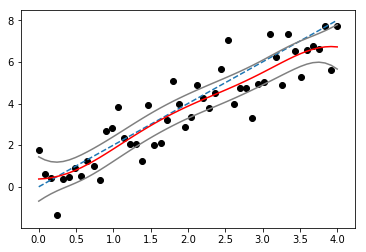

In [71]:
plt.figure()
plt.plot(x, y, '--')
plt.scatter(x, y_obs, color='black')
plt.plot(x, ystar, '-r')
plt.plot(x, y_hi, color='grey')
plt.plot(x, y_lo, color='grey')
plt.show()

In [72]:
samples = gp_obj.rvs(size=100)
int_samples = np.trapz(samples, x, axis=1)
print(int_samples.mean(), int_samples.var())

14.750677210662039 0.28129291981910626


In [73]:
# Now what happens if we also observe/know that the intergral of the data is 16
# /int_0^4 2x dx = 16

l_mu = 16
K = gp_obj.post_cov
L_k = np.trapz(gp_obj.post_cov, x, axis=1)
# L_2 = 3.76
mu_fl = L_k/L_2*l_mu
K_fl = K - np.outer(L_k,L_k.T)/L_2

gp_obj2 = gp.gaussian_process(x, x, y_obs, scale, cov)

gp_obj2.post_mean = mu_fl
gp_obj2.post_cov = K_fl

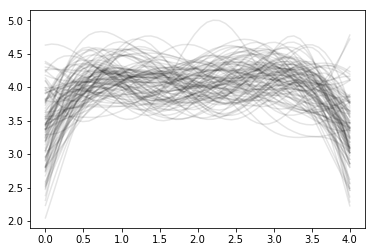

[16.         16.         16.00000001 16.         15.99999998 16.
 16.         16.         15.99999999 16.00000001]


In [77]:
plt.figure()
plt.plot(x, gp_obj2.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

print(np.trapz(gp_obj2.rvs(size=10),x, axis=1))

In [152]:
# Now let's try a df/dx|x=0 = 3

x2 = np.linspace(0, 4, num=100)
y2 = 2*x2
y_obs2 = y2 + stats.norm.rvs(scale=scale, size=len(x2))

cov2 = gp.covariance_functions(1, 20)
gp_obj3 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)
ystar2, var2 = gp_obj3.regression()

l_mu2 = 2
K2 = gp_obj3.post_cov
L_k2 = (gp_obj3.post_cov[1] - gp_obj3.post_cov[0])/(x[1]-x[0])
L_22 = (L_k2[1] - L_k2[0])/(x[1]-x[0])

mu2_fl = L_k2/L_22*l_mu2
K2_fl = K2 - np.outer(L_k2,L_k2.T)/(L_22)

gp_obj4 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)

gp_obj4.post_mean = mu2_fl
gp_obj4.post_cov = K2_fl

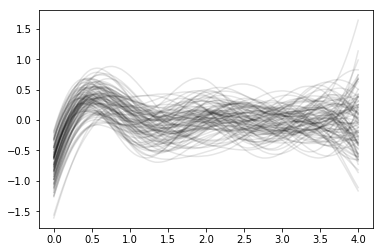

1.9999998728127444


In [155]:
plt.figure()
plt.plot(x2, gp_obj4.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample = gp_obj4.rvs()

print((sample[1]-sample[0])/(x[1]-x[0]))